## Processo Seletivo: Hacker de Fiscalização e Análise de Dados do Gabinete Compartilhado

### Problema:

Crie um arquivo notebook contendo o código (preferencialmente em Python e com comentários) e uma discussão em texto que respondam ao enunciado abaixo.

"Baseado na tabela em CSV com a série histórica 'Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)', disponível no site do Atlas do Estado Brasileiro (IPEA), comente uma ou duas tendências da evolução da remuneração destes servidores de acordo com seu sexo e/ou raça."

### Importando biliotecas necessárias

In [408]:
import os
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Carregando dados

Verifica se arquivo contendo dados de 'Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)' exite. Caso não exista, faz download no site do IPEA (https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv)

In [409]:
if os.path.isfile('./data/5233-liquidosexoraca.csv'):
    print('Arquivo já exite')
else:
    print('Download do arquivo')
    data_url = 'https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv'
    df = pd.read_csv(data_url, sep=";")
    df.to_csv('./data/5233-liquidosexoraca.csv', index=False, sep=";")

Arquivo já exite


Carrega dados no dataframe

In [410]:
df = pd.read_csv('./data/5233-liquidosexoraca.csv', sep=';', index_col=None, usecols=['ano', 'sexo_raça', 'liquido'])
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


Checando tipo dos dados

In [411]:
df.dtypes

ano           int64
sexo_raça    object
liquido      object
dtype: object

Tratando dados numéricos

In [412]:
df['liquido'] = df['liquido'].astype(str)
df['liquido'] = df['liquido'].str.replace(',', '.')
df['liquido'] = df['liquido'].astype(float)
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
1,1999,Homem Negro,4768.7
2,1999,Mulher Branca,5261.6
3,1999,Mulher Negra,4010.0
4,2000,Homem Branco,5690.3


In [413]:
df.dtypes

ano            int64
sexo_raça     object
liquido      float64
dtype: object

In [414]:
hb = df.loc[df['sexo_raça'] == 'Homem Branco']
hn = df.loc[df['sexo_raça'] == 'Homem Negro']
mb = df.loc[df['sexo_raça'] == 'Mulher Branca']
mn = df.loc[df['sexo_raça'] == 'Mulher Negra']
hb.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
4,2000,Homem Branco,5690.3
8,2001,Homem Branco,5833.8
12,2002,Homem Branco,6407.0
16,2003,Homem Branco,6133.3


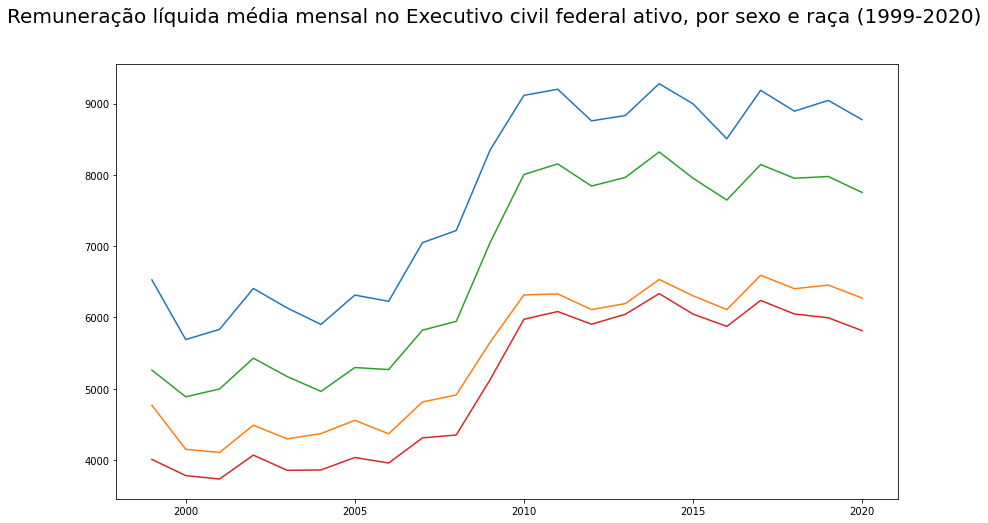

In [415]:
x1 = hb['ano']
y1 = hb['liquido']

x2 = hn['ano']
y2 = hn['liquido']

x3 = mb['ano']
y3 = mb['liquido']

x4 = mn['ano']
y4 = mn['liquido']


fig, ax = plt.subplots(figsize=(14,8))
plt.suptitle('Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)', size=20)

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)